In [ ]:
%%capture
## Importing everything needed for animation
##Installs everything necessary from the text file
!pip install -r requirements.txt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
from matplotlib import patches
from matplotlib import animation
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import re
import geopandas as gpd
from scipy.optimize import minimize
import cv2
import os
import shutil

In [ ]:
# Importing data
cb = pd.read_excel("../datasets/CoralBleaching.xlsx")

# Creates a new dataframe form the `source` dataframe which includes the `new_column` column from `cb`
# if `null` is True, null values in the new column will be retained
# if `new_column` is a list, all the columns will be added
def add_from_cb(source, new_column, null=False, alternative_cb=cb):
    if type(new_column) is str: new_column = [new_column]
    new_df = source.copy()
    # Add columns to new dataframe
    for i in new_column:
        # If there are rows, only add data for existing rows from new column
        if new_df.shape[0] > 0:
            new_df[i] = [
                alternative_cb.loc[ind][i] for ind, row in new_df.iterrows()
            ]
        # If no rows, add all of new column
        else:
            new_df[i] = alternative_cb[i]
        # Remove null data
        if not null: new_df = new_df[~new_df[i].isnull()]
    return new_df

##Cleaning the data
##Making a new dataframe

clean_cb = add_from_cb(pd.DataFrame(), ["REGION", "SUBREGION", "LAT", "LON", "YEAR", "SEVERITY_CODE"])

clean_cb=clean_cb[
    (clean_cb["SEVERITY_CODE"] != -1)
]
                             

This is making an animation of the first geopandas plot to demonstrate the change without the use of sliders.

1973
1979
1980
1981
1982
1983
1986
1987
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012


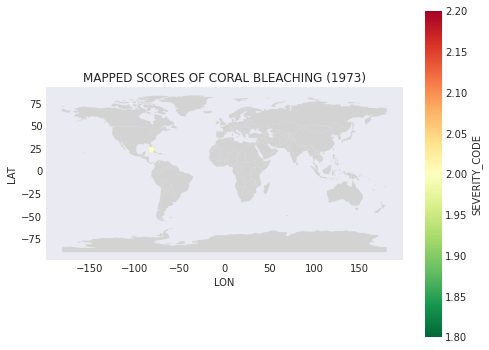

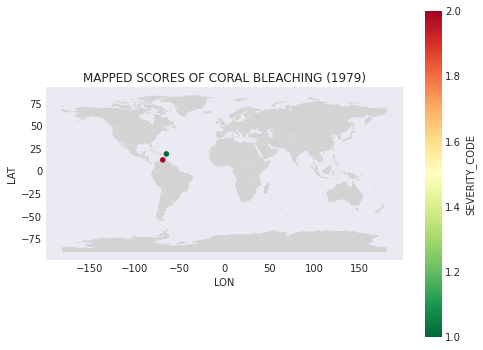

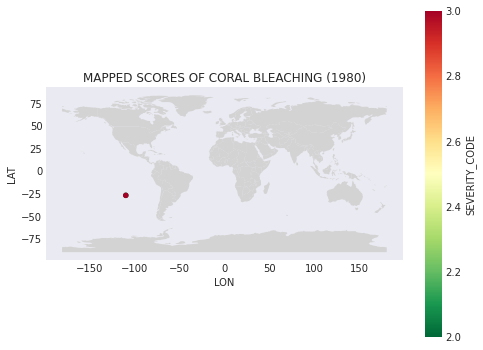

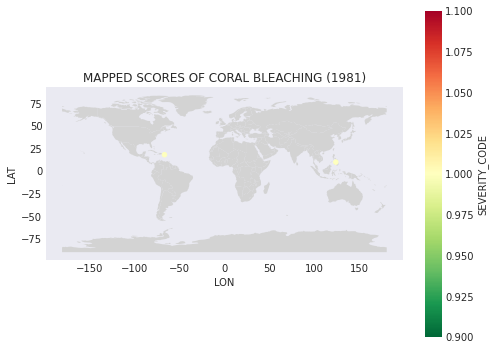

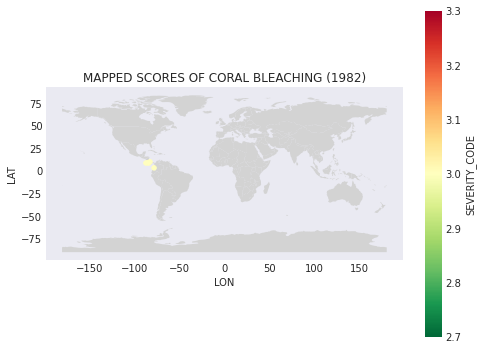

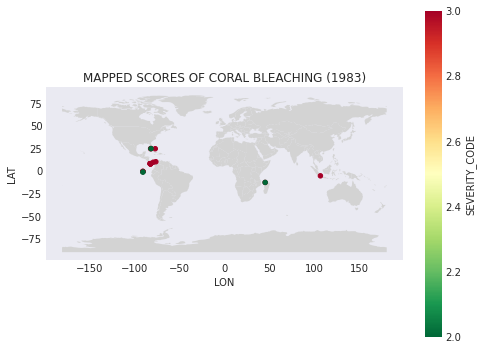

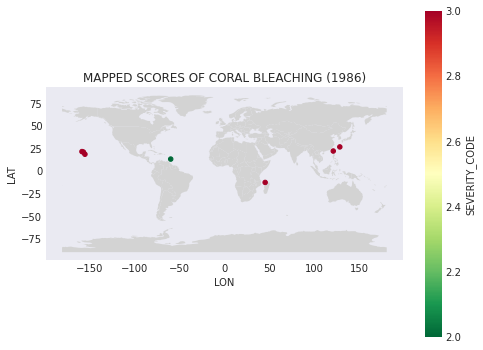

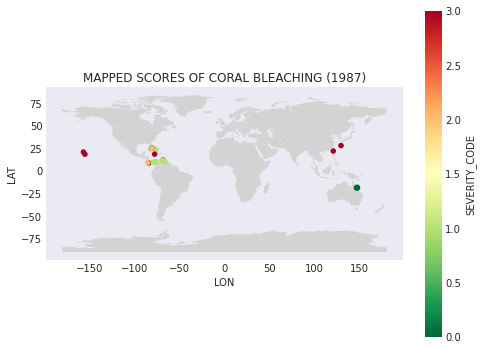

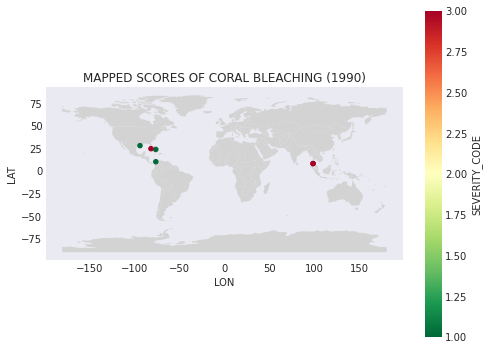

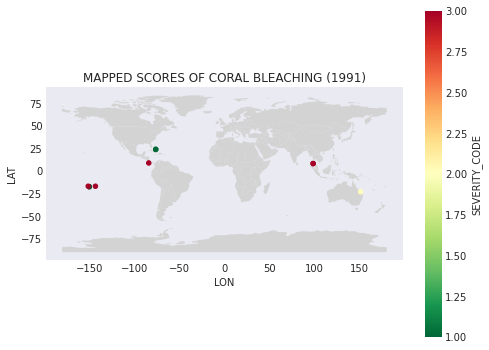

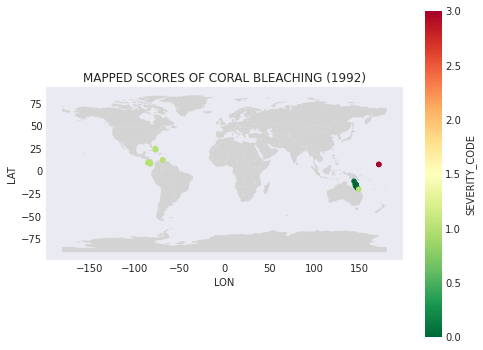

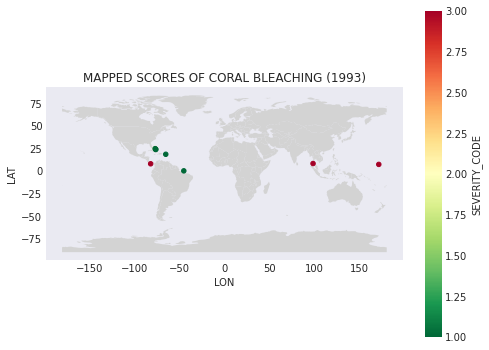

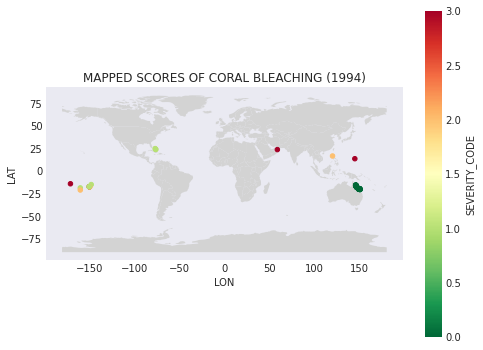

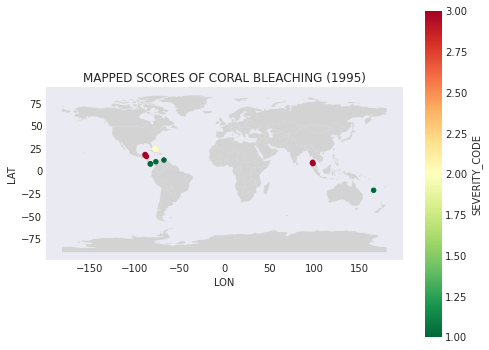

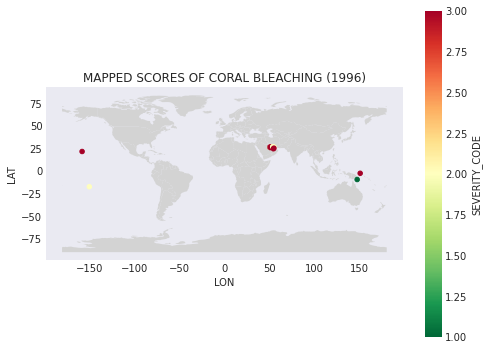

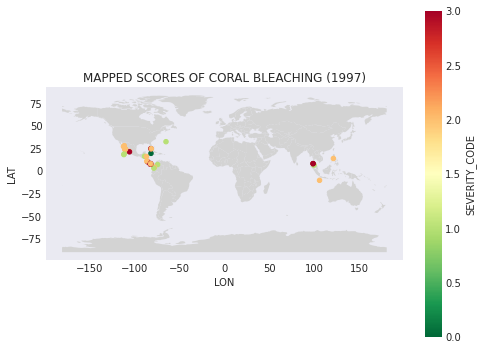

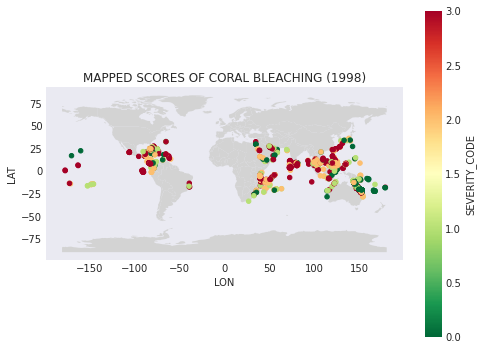

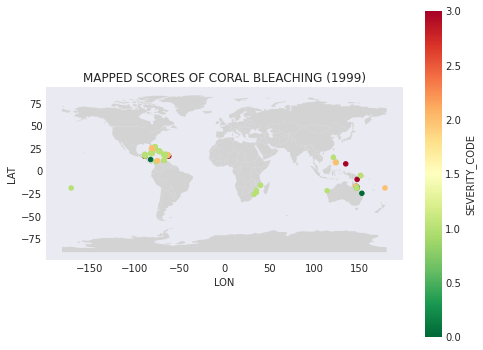

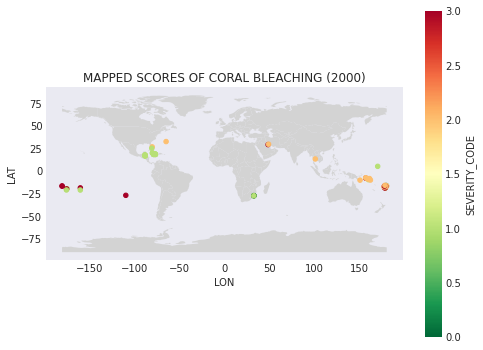

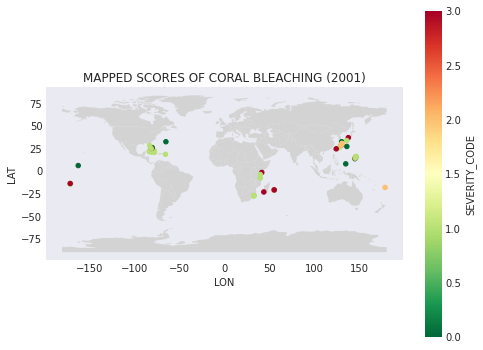

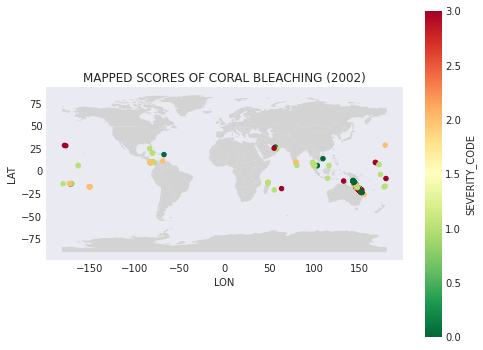

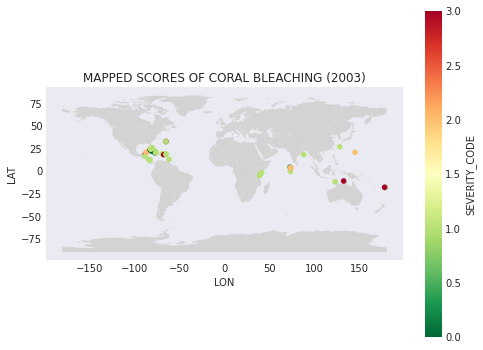

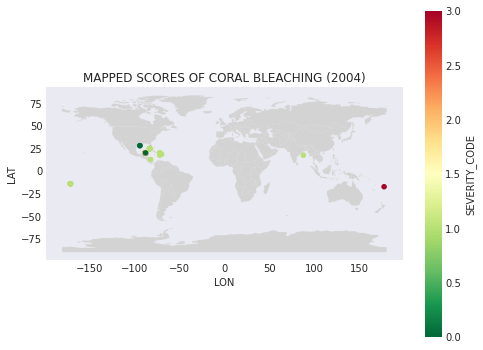

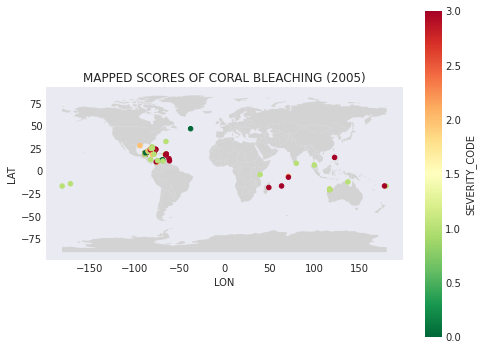

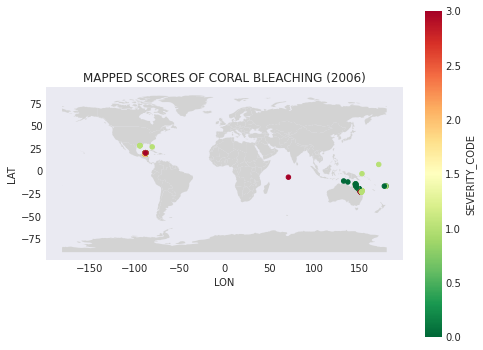

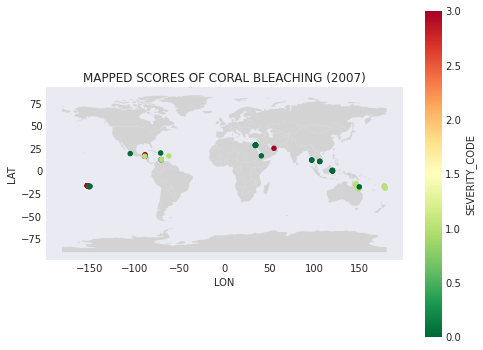

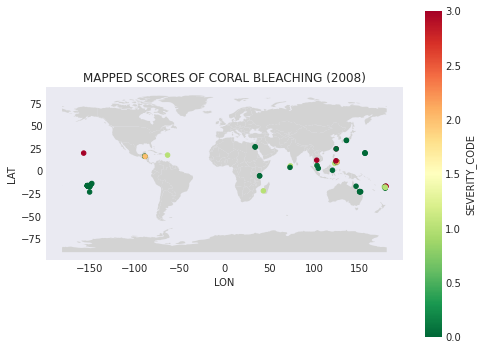

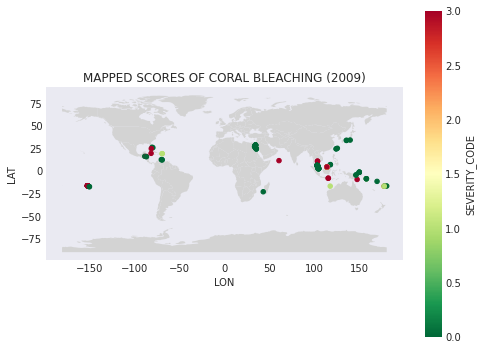

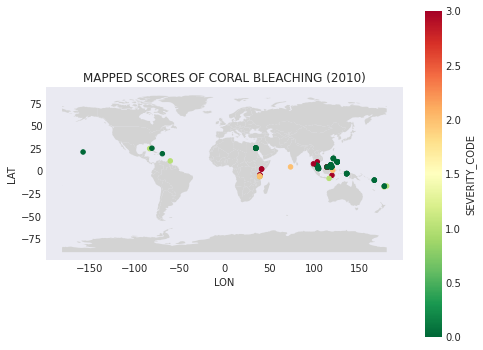

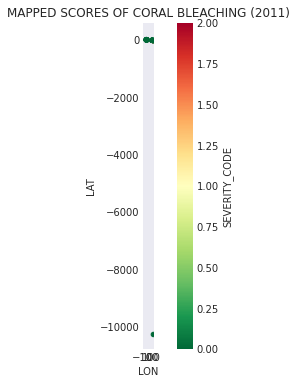

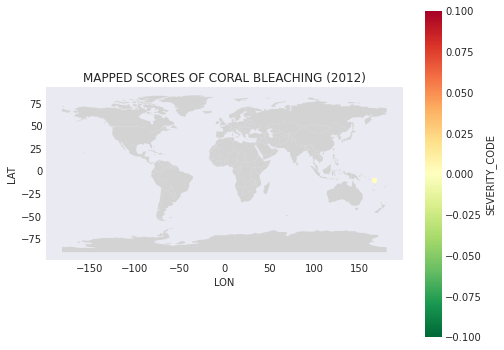

In [ ]:
## Producing the frames for the animation

if not os.path.isdir("frames"):
    os.mkdir("frames")

for YEAR in sorted(clean_cb["YEAR"].unique()):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title(f"MAPPED SCORES OF CORAL BLEACHING ({YEAR})")
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey", ax=ax)
    clean_cb[clean_cb["YEAR"] == YEAR].plot(x="LON", y="LAT", kind="scatter", 
                c="SEVERITY_CODE", colormap="RdYlGn_r", 
                title=f"", 
                ax=ax)
    print(YEAR)
    plt.savefig(f"frames/{YEAR}.png")
    

In [ ]:
## Producing the animation from the frames

frames = []
for i in sorted(clean_cb["YEAR"].unique()):
    img = cv2.imread(f"frames/{i}.png")
    h, w, _ = img.shape
    frames.append(img)

out = cv2.VideoWriter('animation.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 2, (w, h))
for i in range(len(frames)):
    out.write(frames[i])
out.release()

shutil.rmtree("frames")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=15deb56a-811b-4642-b03e-885708f88a3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>